In [107]:
# Import Pandas and NumPy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load csv file data and put it into Pandas dataframe
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

In [5]:
# Group data by survival, since it is a study about titanic survived people
grouped_survival = titanic_df.groupby('Survived')
print grouped_survival.size()

Survived
0    549
1    342
dtype: int64


In [6]:
# Mean calculation between Survived and not
def mean_compare(factor):
    return grouped_survival.mean()[factor]

# Age vs. Survival
print mean_compare('Age')
print ''

# Pclass vs. Survival
print mean_compare('Pclass')
print '' 

# Number of Siblings/Spouses Aboard vs. Survival
print mean_compare('SibSp')
print '' 

# Number of Parents/Children Aboard vs. Survival
print mean_compare('Parch')
print '' 

# Fare vs. Survival
print mean_compare('Fare')

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Survived
0    2.531876
1    1.950292
Name: Pclass, dtype: float64

Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64

Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


In [153]:
# For calculating different categories like male, female,
# this function can calculate the percentage of survival of each category.
def groupby_compare(factor):
    print titanic_df.groupby(factor).size()
    print titanic_df.groupby(factor).sum()['Survived']
    result = titanic_df.groupby(factor).sum()['Survived']/titanic_df.groupby(factor).size()
    print result
    print '' # Empty line
    return result
    
# Pclass vs. Survival
groupby_compare('Pclass')
    
# Sex vs. Survival
groupby_compare('Sex')

# Embarked vs. Survival
groupby_compare('Embarked')

# SibSp vs. Survival
groupby_compare('SibSp')

# Parch vs. Survival
groupby_compare('Parch')

Pclass
1    216
2    184
3    491
dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

Sex
female    314
male      577
dtype: int64
Sex
female    233
male      109
Name: Survived, dtype: int64
Sex
female    0.742038
male      0.188908
dtype: float64

Embarked
C    168
Q     77
S    644
dtype: int64
Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64
Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64
SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
dtype: float64

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64
Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64


Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
dtype: float64

In [15]:
print titanic_df.groupby('Sex').mean()['Age']

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


In [105]:

# Divide two different age groups and compare

def young_vs_adult(age):
    young = titanic_df[titanic_df['Age'] < age]
    adult = titanic_df[titanic_df['Age'] >= age]

    print 'People under',age
    print young.groupby('Survived').count()['PassengerId']/len(young)
    print ''
    print 'People over',age
    print adult.groupby('Survived').count()['PassengerId']/len(adult)
    print ''
    return None
    
young_vs_adult(10)
young_vs_adult(20)
young_vs_adult(30)
young_vs_adult(40)
young_vs_adult(50)
young_vs_adult(60)

People under 10
Survived
0    0.387097
1    0.612903
Name: PassengerId, dtype: float64

People over 10
Survived
0    0.613497
1    0.386503
Name: PassengerId, dtype: float64

People under 20
Survived
0    0.518293
1    0.481707
Name: PassengerId, dtype: float64

People over 20
Survived
0    0.616364
1    0.383636
Name: PassengerId, dtype: float64

People under 30
Survived
0    0.59375
1    0.40625
Name: PassengerId, dtype: float64

People over 30
Survived
0    0.593939
1    0.406061
Name: PassengerId, dtype: float64

People under 40
Survived
0    0.584392
1    0.415608
Name: PassengerId, dtype: float64

People over 40
Survived
0    0.625767
1    0.374233
Name: PassengerId, dtype: float64

People under 50
Survived
0    0.589063
1    0.410938
Name: PassengerId, dtype: float64

People over 50
Survived
0    0.635135
1    0.364865
Name: PassengerId, dtype: float64

People under 60
Survived
0    0.588663
1    0.411337
Name: PassengerId, dtype: float64

People over 60
Survived
0    0.730769
1

In [145]:
%pylab inline
Pclass_age = titanic_df.groupby(['Pclass','Age'], as_index = False).mean()

scaled_entries = Pclass_age['Survived']*100

plt.scatter(Pclass_age['Pclass'], Pclass_age['Age'], s = scaled_entries)

Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib


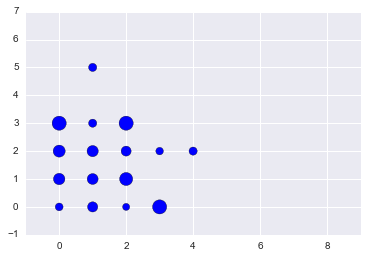

In [148]:
%pylab inline
SibSp_Parch = titanic_df.groupby(['SibSp','Parch'], as_index = False).mean()

scaled_entries = SibSp_Parch['Survived']*200

plt.scatter(SibSp_Parch['SibSp'], SibSp_Parch['Parch'], s = scaled_entries)